# **Data Collection and Loading**

In [ ]:
#Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/customer_acquisition_cost_dataset.csv')

# **Exploratory Data Analysis**

In [ ]:
#Check number of Rows and Columns available
df.shape

(500, 10)

In [ ]:
#Return the First 5 rows of values
df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,CUST0001,Email Marketing,3489.027844,16,NaN,NaN,NaN,NaN,NaN,NaN
1,CUST0002,Online Ads,1107.865808,33,NaN,NaN,NaN,NaN,NaN,NaN
2,CUST0003,Social Media,2576.081025,44,NaN,NaN,NaN,NaN,NaN,NaN
3,CUST0004,Online Ads,3257.567932,32,NaN,NaN,NaN,NaN,NaN,NaN
4,CUST0005,Email Marketing,1108.408185,13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Return the last 5 rows along with their values
df.tail()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
495,CUST0496,Email Marketing,1130.865147,19,NaN,NaN,NaN,NaN,NaN,NaN
496,CUST0497,Social Media,2482.119835,18,NaN,NaN,NaN,NaN,NaN,NaN
497,CUST0498,Online Ads,2773.532344,12,NaN,NaN,NaN,NaN,NaN,NaN
498,CUST0499,Social Media,4802.220679,28,NaN,NaN,NaN,NaN,NaN,NaN
499,CUST0500,Online Ads,4421.800773,40,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Return the info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
 4   Unnamed: 4         0 non-null      float64
 5   Unnamed: 5         0 non-null      float64
 6   Unnamed: 6         0 non-null      float64
 7   Unnamed: 7         0 non-null      float64
 8   Unnamed: 8         0 non-null      float64
 9   Unnamed: 9         1 non-null      object 
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
#Returns description of Data in Main DataFrame
df.describe()

,Marketing_Spend,New_Customers,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,500.000000,500.000000,0.0,0.0,0.0,0.0,0.0
mean,3094.726549,30.070000,NaN,NaN,NaN,NaN,NaN
std,1136.628605,11.754209,NaN,NaN,NaN,NaN,NaN
min,1010.702890,10.000000,NaN,NaN,NaN,NaN,NaN
25%,2131.835093,19.000000,NaN,NaN,NaN,NaN,NaN
50%,3155.976674,31.000000,NaN,NaN,NaN,NaN,NaN
75%,4027.494116,40.000000,NaN,NaN,NaN,NaN,NaN
max,4999.631314,50.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Returns the datatypes of the columns
df.dtypes

Customer_ID           object
Marketing_Channel     object
Marketing_Spend      float64
New_Customers          int64
Unnamed: 4           float64
Unnamed: 5           float64
Unnamed: 6           float64
Unnamed: 7           float64
Unnamed: 8           float64
Unnamed: 9            object
dtype: object

In [ ]:
#Checks whether the values in the dataset are null or not
df.isnull()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,True,True,True,True,True,True
496,False,False,False,False,True,True,True,True,True,True
497,False,False,False,False,True,True,True,True,True,True
498,False,False,False,False,True,True,True,True,True,True


In [ ]:
#Returns the number of unique Values available
df.nunique()

Customer_ID          500
Marketing_Channel      4
Marketing_Spend      500
New_Customers         41
Unnamed: 4             0
Unnamed: 5             0
Unnamed: 6             0
Unnamed: 7             0
Unnamed: 8             0
Unnamed: 9             1
dtype: int64

# **Feature Engineering**

In [ ]:
#Assigning Numeric and Categorical Features based on the available Columns
numeric_features = ['Marketing_Spend', 'New_Customers']
categorical_features = ['Customer_ID', 'Marketing_Channel']

In [ ]:
# Calculate Customer Acquisition Cost (CAC) and append it as a new column
df['Customer_Acquisition_Cost'] = df['Marketing_Spend'] / df['New_Customers']
print(df)


    Customer_ID Marketing_Channel  Marketing_Spend  New_Customers  Unnamed: 4  \
0      CUST0001   Email Marketing      3489.027844             16         NaN   
1      CUST0002        Online Ads      1107.865808             33         NaN   
2      CUST0003      Social Media      2576.081025             44         NaN   
3      CUST0004        Online Ads      3257.567932             32         NaN   
4      CUST0005   Email Marketing      1108.408185             13         NaN   
..          ...               ...              ...            ...         ...   
495    CUST0496   Email Marketing      1130.865147             19         NaN   
496    CUST0497      Social Media      2482.119835             18         NaN   
497    CUST0498        Online Ads      2773.532344             12         NaN   
498    CUST0499      Social Media      4802.220679             28         NaN   
499    CUST0500        Online Ads      4421.800773             40         NaN   

     Unnamed: 5  Unnamed: 6

In [ ]:
#Assigning the Values of X and y
X = df.drop(columns=['Customer_Acquisition_Cost'])  # Drop the target variable column
y = df['Customer_Acquisition_Cost']  # Assign the target variable column to 'y'

In [ ]:
#Splitting the values of X and y into respective training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#We use pipeline in order to combine multiple small steps into a single Object
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#We use one hot encoding in order to transform the categorical data into numerical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#This estimator allows different columns or column subsets of the input to be transformed separately
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

In [ ]:
#We are implementing the use of RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

In [ ]:
#We fit the model and train it in order to return predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 66.8894494   55.04546024  92.82158969 120.31934615  93.80900005
 114.04147434  60.38244395 138.57734486  78.39739183  91.66770166
 112.19006508  96.49498702 148.91269426  49.90681051  42.58891583
  83.90220954  88.79026041 138.02441457  89.28526693 181.78991436
 166.60595024  98.29863806  78.26907967  97.7875801   98.63543828
 143.9092907   86.55181324  94.74729246  62.34824191 113.99315384
  43.45764307  69.59808171  48.01538874  96.0829403  142.76625158
  66.72316713 184.32282506  95.26585933  60.25755859  65.47739766
  30.70263487  48.3619704  254.30962023  67.21741365 134.20703547
 327.37350271 203.20702195 126.21096426 131.18232024  77.81977012
 193.77812091  73.59750031 100.51032007  87.03057266 114.54906397
 126.8112243   81.66837609  47.83604531  54.44954356 327.37350271
  55.91591945  45.81631411 149.60135406 127.11254864 262.60429408
  51.58245694 113.18397535 105.09801485  52.25827516 179.64096473
 101.00031911 316.02538406 207.10683501  35.06985209 114.52088404
 144.24293

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test are the test values and y_pred are the predicted values
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.9858524249911845


In [ ]:
#We calculate the Mean Squared Error for the prediction by comparing it with the test data
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 70.816118887925


# **Analysis Phase**

<ipython-input-19-72451543df66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Marketing_Channel', y='Customer_Acquisition_Cost',palette='Set3')


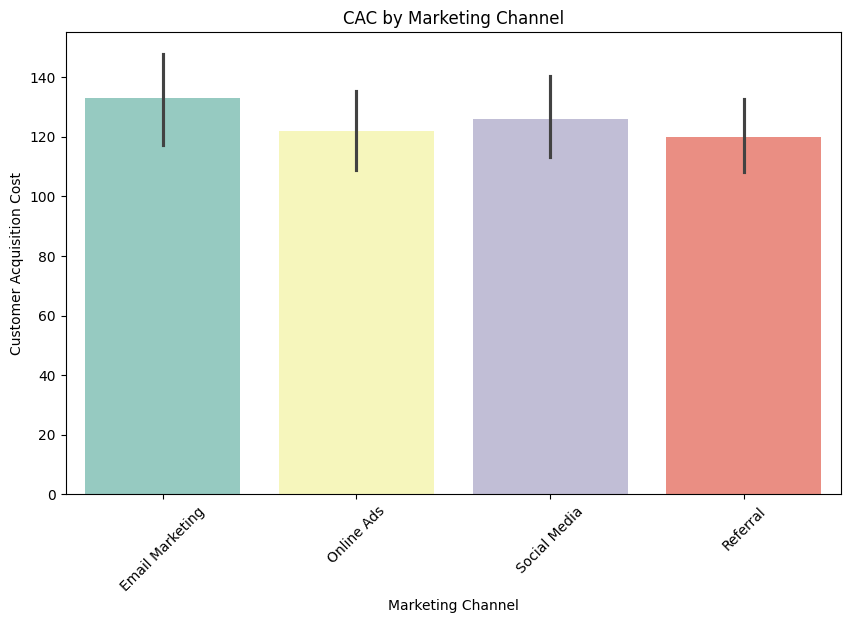

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marketing_Channel', y='Customer_Acquisition_Cost',palette='Set3')
plt.title('CAC by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Customer Acquisition Cost')
plt.xticks(rotation=45)
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


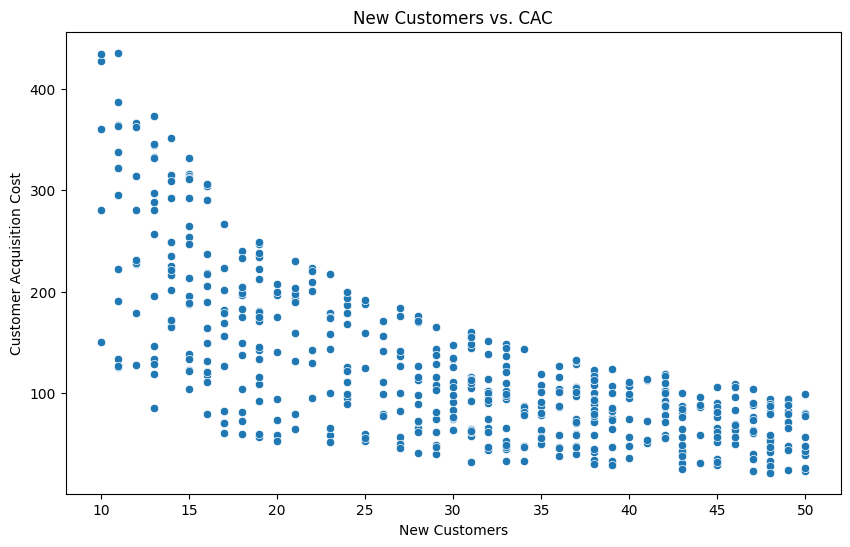

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='New_Customers', y='Customer_Acquisition_Cost', cmap='viridis')
plt.title('New Customers vs. CAC')
plt.xlabel('New Customers')
plt.ylabel('Customer Acquisition Cost')
plt.show()



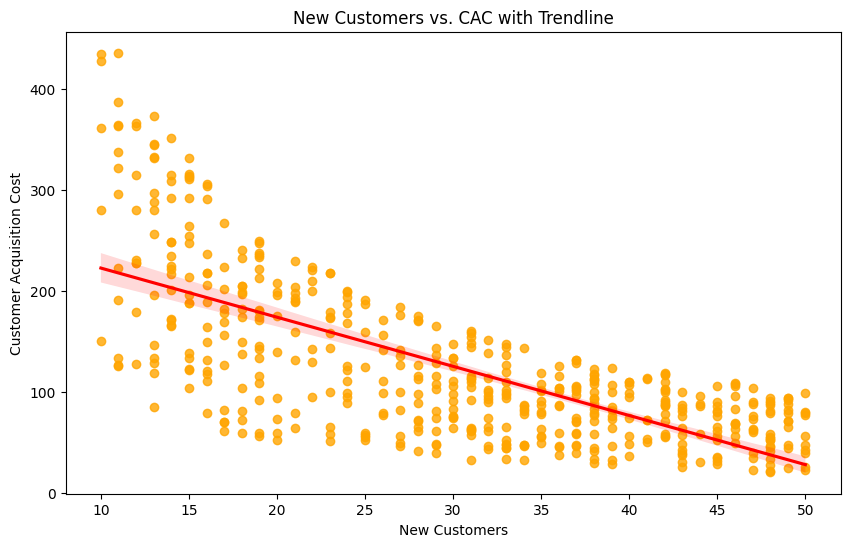

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='New_Customers', y='Customer_Acquisition_Cost', scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.title('New Customers vs. CAC with Trendline')
plt.xlabel('New Customers')
plt.ylabel('Customer Acquisition Cost')
plt.show()


In [ ]:
df

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Customer_Acquisition_Cost
0,CUST0001,Email Marketing,3489.027844,16,NaN,NaN,NaN,NaN,NaN,NaN,218.064240
1,CUST0002,Online Ads,1107.865808,33,NaN,NaN,NaN,NaN,NaN,NaN,33.571691
2,CUST0003,Social Media,2576.081025,44,NaN,NaN,NaN,NaN,NaN,NaN,58.547296
3,CUST0004,Online Ads,3257.567932,32,NaN,NaN,NaN,NaN,NaN,NaN,101.798998
4,CUST0005,Email Marketing,1108.408185,13,NaN,NaN,NaN,NaN,NaN,NaN,85.262168
...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,Email Marketing,1130.865147,19,NaN,NaN,NaN,NaN,NaN,NaN,59.519218
496,CUST0497,Social Media,2482.119835,18,NaN,NaN,NaN,NaN,NaN,NaN,137.895546
497,CUST0498,Online Ads,2773.532344,12,NaN,NaN,NaN,NaN,NaN,NaN,231.127695
498,CUST0499,Social Media,4802.220679,28,NaN,NaN,NaN,NaN,NaN,NaN,171.507881


In [ ]:
summary_stats = df.groupby('Marketing_Channel')['Customer_Acquisition_Cost'].describe()
print(summary_stats)

                   count        mean        std        min        25%  \
Marketing_Channel                                                       
Email Marketing    124.0  132.913758  89.597107  23.491784  68.226195   
Online Ads         130.0  122.135938  79.543793  24.784414  62.207753   
Referral           128.0  119.892174  74.101916  22.012364  71.347939   
Social Media       118.0  126.181913  77.498788  21.616453  75.633389   

                          50%         75%         max  
Marketing_Channel                                      
Email Marketing    106.940622  177.441898  434.383446  
Online Ads          97.736027  163.469540  386.751285  
Referral            99.835688  137.577935  366.525209  
Social Media       102.620356  167.354709  435.487346  


In [ ]:
df['Conversion_Rate'] = df['New_Customers'] / df['Marketing_Spend'] * 100

<ipython-input-25-dbbefb8355d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Marketing_Channel', y='Conversion_Rate',palette='Set3')


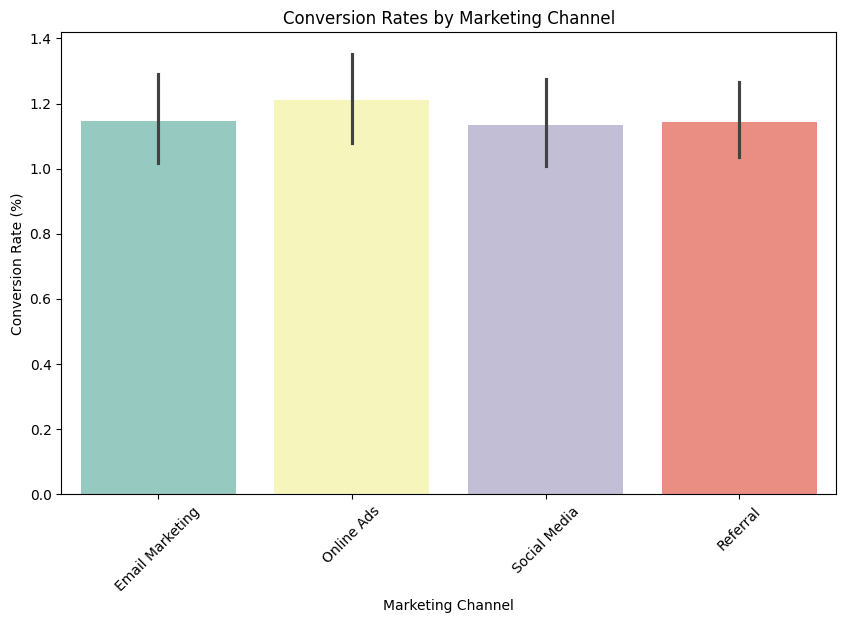

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marketing_Channel', y='Conversion_Rate',palette='Set3')
plt.title('Conversion Rates by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Break_Even_Customers'] = df['Marketing_Spend'] / df['Customer_Acquisition_Cost']

<ipython-input-31-79dbecfb1e65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Marketing_Channel', y='Break_Even_Customers', palette='Set3')


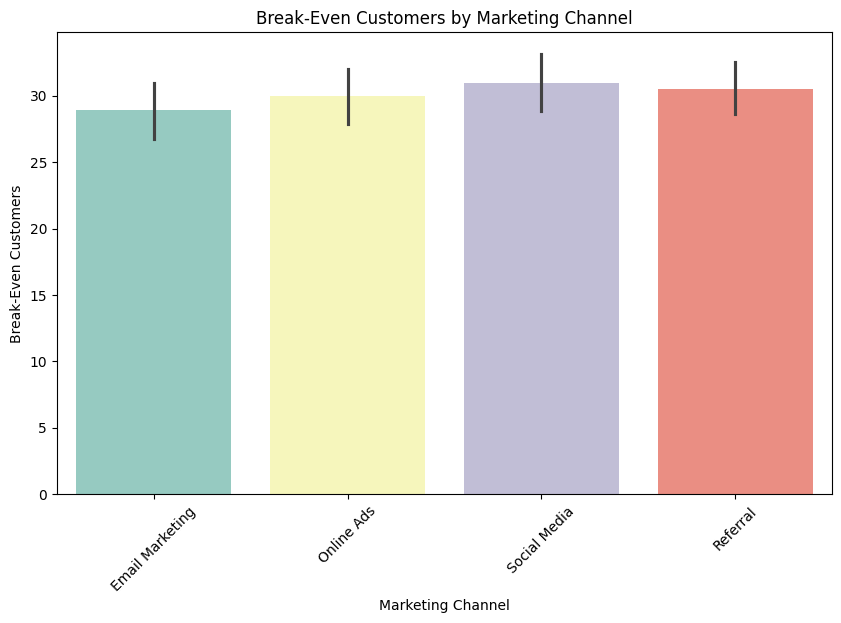

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marketing_Channel', y='Break_Even_Customers', palette='Set3')
plt.title('Break-Even Customers by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Break-Even Customers')
plt.xticks(rotation=45)
plt.show()

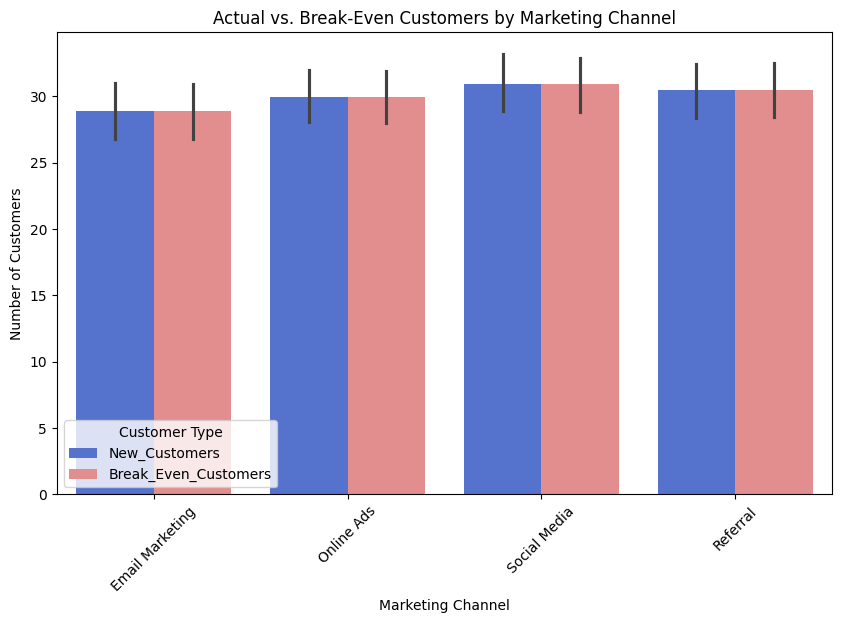

In [ ]:
plt.figure(figsize=(10, 6))
# Combine the data for actual customers acquired and break-even customers into a single DataFrame
combined_data = pd.concat([df['Marketing_Channel'], df['New_Customers'], df['Break_Even_Customers']], axis=1)
# Melt the DataFrame to reshape it for plotting
melted_data = pd.melt(combined_data, id_vars=['Marketing_Channel'], var_name='Customer_Type', value_name='Number_of_Customers')
# Create the grouped bar plot
sns.barplot(data=melted_data, x='Marketing_Channel', y='Number_of_Customers', hue='Customer_Type', palette=['royalblue', 'lightcoral'])
plt.title('Actual vs. Break-Even Customers by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')

plt.show()